In [53]:
#pip install textblob

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

import re

In [55]:
email_df = pd.read_excel("email.xlsx")

In [56]:
email_df.head()

,Subject,From Email,To Email,Date,Time,Body,Attachments
0,Event Recap,jane.smith@comdomain.com,chris.wilson@comdomain.com,2024-09-25,08:51,"Dear chris.wilson,\n\nThis is the body of the ...",Yes
1,Weekly Report,jane.smith@comdomain.com,mark.jones@comdomain.com,2024-09-23,08:51,"Dear mark.jones,\n\nThis is the body of the em...",Yes
2,Event Recap,linda.brown@comdomain.com,john.doe@comdomain.com,2024-09-12,08:51,"Dear john.doe,\n\nThis is the body of the emai...",No
3,Training Schedule,mark.jones@comdomain.com,jane.smith@comdomain.com,2024-09-12,08:51,"Dear jane.smith,\n\nThis is the body of the em...",Yes
4,Event Recap,jane.smith@comdomain.com,linda.brown@comdomain.com,2024-09-27,08:51,"Dear linda.brown,\n\nThis is the body of the e...",Yes


In [57]:
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Subject      50 non-null     object        
 1   From Email   50 non-null     object        
 2   To Email     50 non-null     object        
 3   Date         50 non-null     datetime64[ns]
 4   Time         50 non-null     object        
 5   Body         50 non-null     object        
 6   Attachments  50 non-null     object        
dtypes: datetime64[ns](1), object(6)
memory usage: 2.9+ KB


In [58]:
email_df.describe()

,Date
count,50
mean,2024-09-20 02:24:00
min,2024-09-05 00:00:00
25%,2024-09-12 06:00:00
50%,2024-09-22 00:00:00
75%,2024-09-26 18:00:00
max,2024-10-04 00:00:00


In [59]:
email_df.isnull().sum()

Subject        0
From Email     0
To Email       0
Date           0
Time           0
Body           0
Attachments    0
dtype: int64

In [60]:
# Replace newline characters in the Body column
email_df['Body'] = email_df['Body'].replace('\n', ' ', regex=True)

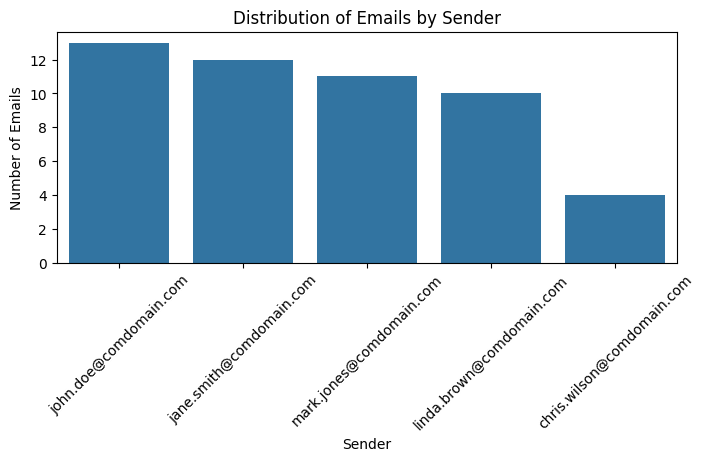

In [132]:
# Visualize the distribution of emails by sender
plt.figure(figsize=(8, 3))
sns.countplot(data=email_df, x='From Email', order=email_df['From Email'].value_counts().index)
plt.title('Distribution of Emails by Sender')
plt.xlabel('Sender')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45)
plt.show()

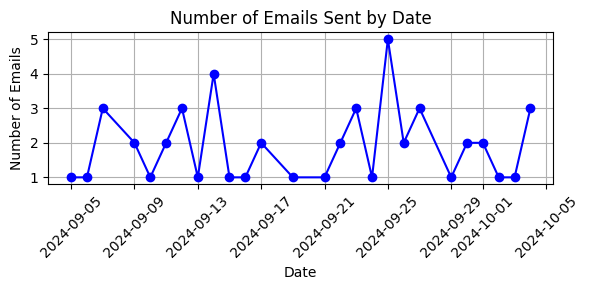

In [129]:
# Create a line chart to visualize the distribution of emails by date
plt.figure(figsize=(6, 3))

# Count the number of emails per date
emails_per_date = email_df['Date'].value_counts().sort_index()

# Plot the line chart
plt.plot(emails_per_date.index, emails_per_date.values, marker='o', linestyle='-', color='b')

plt.title('Number of Emails Sent by Date')
plt.xlabel('Date')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

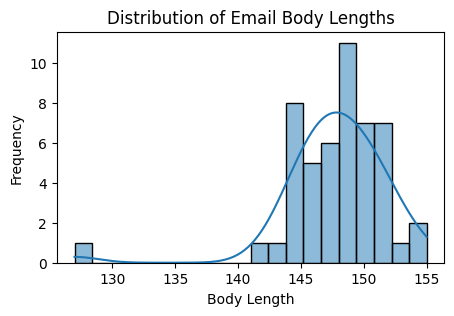

In [128]:
# Analyze the content of the emails
# Example: Length of email bodies
email_df['Body Length'] = email_df['Body'].apply(len)

plt.figure(figsize=(5, 3))
sns.histplot(email_df['Body Length'], bins=20, kde=True)
plt.title('Distribution of Email Body Lengths')
plt.xlabel('Body Length')
plt.ylabel('Frequency')
plt.show()

In [127]:
# Summary of findings
summary = email_df.groupby('From Email').agg({'Body Length': ['mean', 'min', 'max'], 'Attachments': 'value_counts'})


In [126]:
# Function to calculate sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis on the Body
email_df['Sentiment'] = email_df['Body'].apply(get_sentiment)

# Categorize sentiments
email_df['Sentiment Category'] = email_df['Sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display a sample of the dataframe with sentiments
print(email_df[['Body', 'Sentiment', 'Sentiment Category']].head())

                                                Body  Sentiment  \
0  Dear chris.wilson,  This is the body of the em...        1.0   
1  Dear mark.jones,  This is the body of the emai...        1.0   
2  Dear john.doe,  This is the body of the email ...        1.0   
3  Dear jane.smith,  This is the body of the emai...        1.0   
4  Dear linda.brown,  This is the body of the ema...        1.0   

  Sentiment Category  
0           Positive  
1           Positive  
2           Positive  
3           Positive  
4           Positive  


In [124]:
# Display a sample of the dataframe with sentiments
email_df[['Body', 'Sentiment', 'Sentiment Category']].head(2)

,Body,Sentiment,Sentiment Category
0,"Dear chris.wilson, This is the body of the em...",1.0,Negative
1,"Dear mark.jones, This is the body of the emai...",1.0,Negative


In [137]:
# Show rows where Sentiment is less than 1
neg = email_df[email_df['Sentiment'] < 1]
neg.head(2)

,Subject,From Email,To Email,Date,Time,Body,Attachments,Body Length,Sentiment,Sentiment Category,Username,Domain
10,Workshop Invitation,john.doe@comdomain.com,jane.smith@comdomain.com,2024-10-02,08:51,"Dear jane.smith, I'm really disappointed with...",Yes,152,0.187500,Positive,jane.smith,comdomain.com
11,Market Research,mark.jones@comdomain.com,chris.wilson@comdomain.com,2024-09-23,08:51,"Dear chris.wilson, The service was unacceptab...",No,127,0.366667,Positive,chris.wilson,comdomain.com


In [93]:
# Split the 'From Email' into two columns: 'Username' and 'Domain'
email_df[['Username', 'Domain']] = email_df['To Email'].str.split('@', expand=True)

# Display the updated DataFrame
#email_df.head()

In [99]:
to_domain_group = email_df.groupby(['Domain']).agg(
    To_Domain_count=('Domain','count')
).reset_index()
to_domain_group                            

,Domain,To_Domain_count
0,comdomain.com,50


In [111]:
# Group by 'Domain' and select 'Username' and 'Subject'
#to_name = email_df.groupby('Domain')[['Username', 'Subject']].apply(list)
to_name = email_df.groupby('Username')['Domain'].count()
# Display the grouped data
to_name


Username
chris.wilson    11
jane.smith      10
john.doe         9
linda.brown     11
mark.jones       9
Name: Domain, dtype: int64

In [117]:
# Count the number of emails per Username
#email_count = email_df['Username'].value_counts().reset_index()
#email_count.columns = ['Username', 'Count']

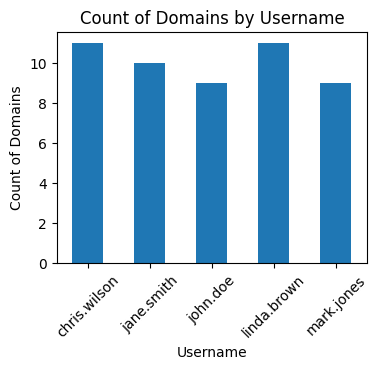

In [123]:
# Plot the bar chart
plt.figure(figsize=(4, 3))
to_name.plot(kind='bar')

# Add titles and labels
plt.title('Count of Domains by Username')
plt.xlabel('Username')
plt.ylabel('Count of Domains')

# Show the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for readability
plt.show()

In [ ]:
email_df.to_excel(filename, index=False)